## To-do:

- Improve function aggregate (for any number of entries)
- Make PCA relevant?
- Features correlations

# Table of contents

- [Univariate analyses](#univariate_analyses)
    - [Countries](#countries)
    - [Product name](#product_name)
    - [Ingredients from palm oil](#ingredients_from_palm_oil)
    - [Ingredients maybe from palm oil](#ingredients_maybe_from_palm_oil)
    - [Creators](#creator)
    - [Nutrition grade](#nutrition_grade)
    - [Brands](#brands)
    - [Additives](#additives)
    - [_100g](#_100g)
    - [date_created](#date_created)
    - [last_modified](#last_modified)
- [Bivariate analyses](#bivariate_analyses)
    - `Nutrition grade` vs `Country`
    - _100g vs `Country`
- [Correlations](#correlation)

<a name='data_analysis'></a>
# Data Analysis

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from platform import python_version
print('Python:', python_version())
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.8.8
matplotlib: 3.6.0


In [2]:
#pip install matplotlib --upgrade --user

In [3]:
def aggregate(column_1, column_2, column_3):
    
    """
    Function to aggregate values of 3 series.
    
    INPUT: column_1 --series
           column_2 --series
           column_3 --series
    
    OUTPUT: agg --series
    """
    
    agg = pd.DataFrame(column_1.value_counts()).merge(column_2.value_counts(), how='outer', left_index=True, right_index=True)
    agg = agg.merge(column_3.value_counts(), how='outer', left_index=True, right_index=True)
    agg = agg.fillna(0)
    agg = (agg[agg.columns[0]] + agg[agg.columns[1]] + agg[agg.columns[2]]).sort_values(ascending=False)
    
    return agg

In [4]:
data = pd.read_csv('cleaned_data.csv',
                   sep=',',
                   parse_dates=['date_created', 'last_modified'],
                   low_memory=False)

In [5]:
print(data.info())
with pd.option_context('display.max_columns', None):
    display(data.head())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288941 entries, 0 to 288940
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     288941 non-null  object        
 1   url                                      288941 non-null  object        
 2   creator                                  288941 non-null  object        
 3   product_name                             288941 non-null  object        
 4   ingredients_from_palm_oil_n              288941 non-null  object        
 5   ingredients_that_may_be_from_palm_oil_n  288941 non-null  object        
 6   nutrition_grade_fr                       288941 non-null  object        
 7   energy_100g                              288941 non-null  float64       
 8   fat_100g                                 288941 non-null  float64       
 9   saturated-fat_100g        

,code,url,creator,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,date_created,last_modified,country_1,country_2,country_3,brand_1,brand_2,brand_3,additive_1,additive_2,additive_3,additive_4,additive_5,additive_6,additive_7,additive_8,additive_9,additive_10
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,farine de blé noir,not specified,not specified,not specified,1031.871034,10.771763,4.240857,31.049571,14.112095,6.700509,0.871093,0.34302,2016-09-17 09:17:46,2016-09-17 09:18:13,en:france,not specified,not specified,ferme-t-y-r-nao,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
1,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,peanuts,0.0,0.0,b,1941.000000,17.860000,0.000000,60.710000,17.860000,17.860000,0.635000,0.25000,2017-03-09 14:32:37,2017-03-09 14:32:37,en:united-states,not specified,not specified,torn-glasser,not specified,not specified,peanuts,wheat-flour,flour,sugar,rice-flour,flour,tapioca-starch,starch,salt,leavening
2,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,organic salted nut mix,0.0,0.0,d,2540.000000,57.140000,5.360000,17.860000,3.570000,17.860000,1.224280,0.48200,2017-03-09 10:35:31,2017-03-09 10:35:31,en:united-states,not specified,not specified,grizzlies,not specified,not specified,organic-hazelnuts,hazelnuts,organic-cashews,cashews,organic-walnuts-almonds,walnuts-almonds,almonds,organic-sunflower-oil,sunflower-oil,oil
3,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,organic polenta,0.0,0.0,not specified,1552.000000,1.430000,4.240857,77.140000,14.112095,8.570000,0.871093,0.34302,2017-03-09 10:34:13,2017-03-09 10:34:13,en:united-states,not specified,not specified,bob-s-red-mill,not specified,not specified,organic-polenta,polenta,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
4,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,breadshop honey gone nuts granola,0.0,0.0,not specified,1933.000000,18.270000,1.920000,63.460000,11.540000,13.460000,0.871093,0.34302,2017-03-09 10:34:11,2017-03-09 10:34:11,en:united-states,not specified,not specified,unfi,not specified,not specified,rolled-oats,oats,grape-concentrate,concentrate,expeller-pressed-canola-oil,pressed-canola-oil,canola-oil,oil,sunflower-seeds,seeds


(288941, 33)


<a name='univariate_analyses'></a>
# Univariate Analyses

<a name='countries'></a>
## `Country`

In [6]:
countries_agg = aggregate(data['country_1'], data['country_2'], data['country_3'])

In [7]:
print(countries_agg)

not specified                             572890.0
en:united-states                          150958.0
en:france                                  91769.0
en:switzerland                             15540.0
en:germany                                  8005.0
                                            ...   
en:etats-unis                                  1.0
en:virgin-islands-of-the-united-states         1.0
en:rwanda                                      1.0
en:worldwide                                   1.0
other-日本                                       1.0
Length: 230, dtype: float64


Text(0.5, 1.0, 'Country repartition')

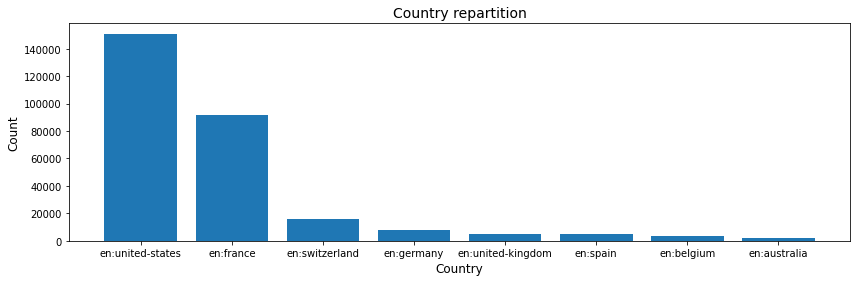

In [8]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(countries_agg.index[1:9], countries_agg.values[1:9])
ax.set_xlabel('Country', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Country repartition', size=14)

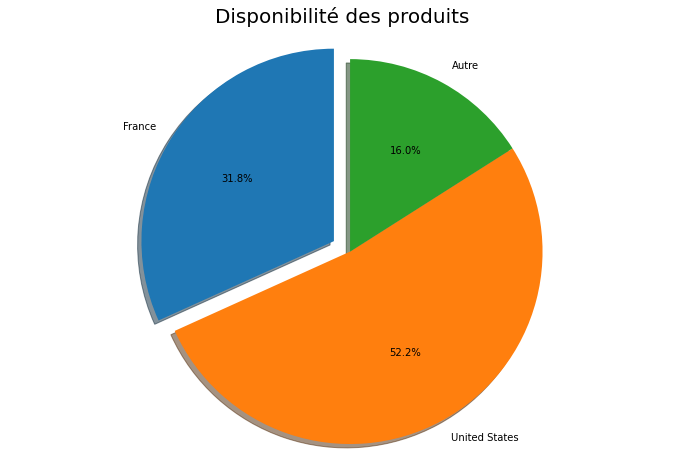

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
ax.pie([countries_agg['en:france'], countries_agg['en:united-states'], len(data) - countries_agg['en:france'] - countries_agg['en:united-states']],
       labels=['France', 'United States','Autre'],
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       explode=(0.1, 0, 0))
ax.axis('equal')
ax.set_title('Disponibilité des produits', size=20)
plt.show()

<a name='product_name'></a>
## `Product name`

In [10]:
products_agg = data['product_name'].value_counts()

Text(0.5, 1.0, 'Product repartition')

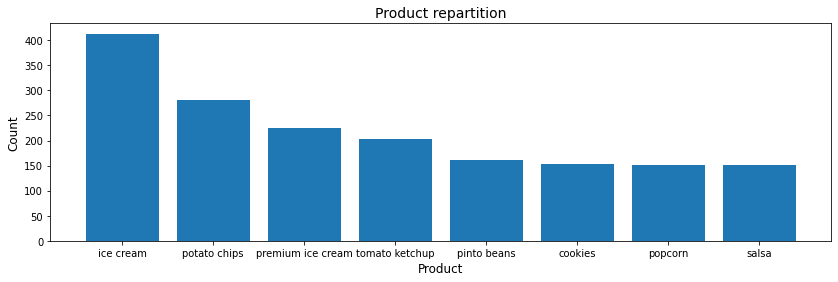

In [11]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(products_agg.index[1:9], products_agg.values[1:9])
ax.set_xlabel('Product', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Product repartition', size=14)

<a name='ingredients_from_palm_oil'></a>
## `Ingredients from palm oil`

In [40]:
ingredients_from_palm_oil = data['ingredients_from_palm_oil_n'].value_counts().sort_index(ascending=True)

In [41]:
ingredients_from_palm_oil

0.0              216001
1.0                4401
2.0                  57
not specified     68482
Name: ingredients_from_palm_oil_n, dtype: int64

Text(0.5, 1.0, 'Number of ingredients from palm oil')

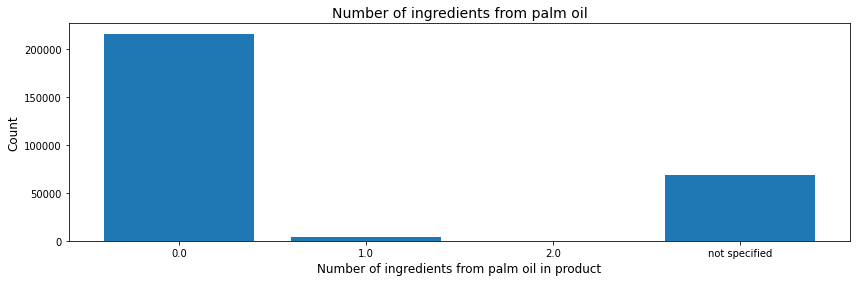

In [43]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(ingredients_from_palm_oil.index, ingredients_from_palm_oil.values)
ax.set_xlabel('Number of ingredients from palm oil in product', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Number of ingredients from palm oil', size=14)

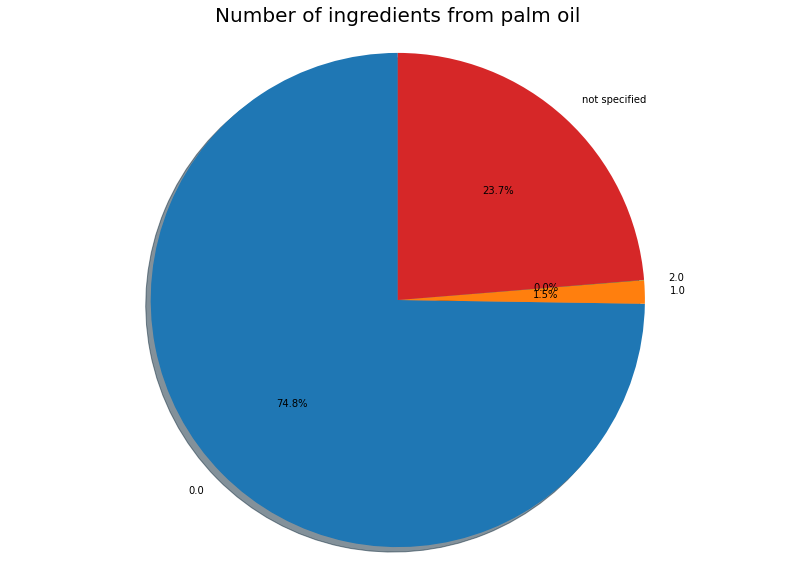

In [48]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(ingredients_from_palm_oil.values,
       labels=ingredients_from_palm_oil.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')
ax.set_title('Number of ingredients from palm oil', size=20)
plt.show()

<a name='ingredients_maybe_from_palm_oil'></a>
## `Ingredients maybe from palm oil`

In [45]:
ingredients_maybe_from_palm_oil = data['ingredients_that_may_be_from_palm_oil_n'].value_counts().sort_index(ascending=True)

In [46]:
ingredients_maybe_from_palm_oil

0.0              209493
1.0                9391
2.0                1259
3.0                 265
4.0                  45
5.0                   5
6.0                   1
not specified     68482
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

Text(0.5, 1.0, 'Number of ingredients that may be from palm oil')

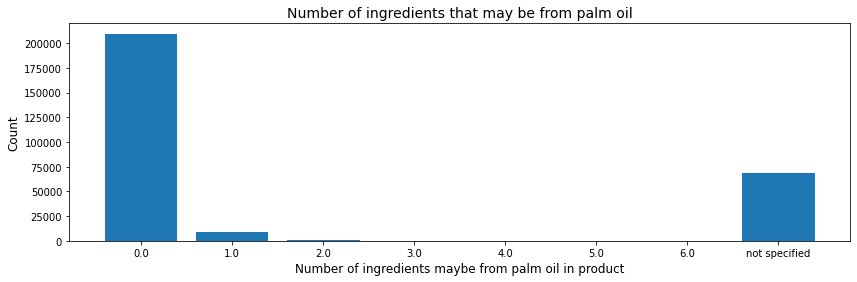

In [47]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(ingredients_maybe_from_palm_oil.index, ingredients_maybe_from_palm_oil.values)
ax.set_xlabel('Number of ingredients maybe from palm oil in product', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Number of ingredients that may be from palm oil', size=14)

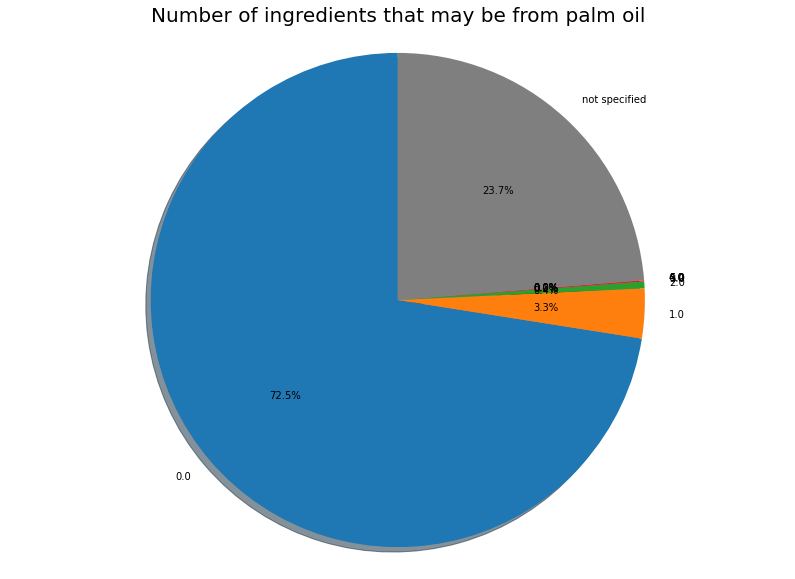

In [49]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(ingredients_maybe_from_palm_oil.values,
       labels=ingredients_maybe_from_palm_oil.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')
ax.set_title('Number of ingredients that may be from palm oil', size=20)
plt.show()

<a name='creator'></a>
## `Creator`

### Contribution by creators

In [12]:
creators_agg = data['creator'].value_counts()

Text(0.5, 1.0, 'Creator repartition')

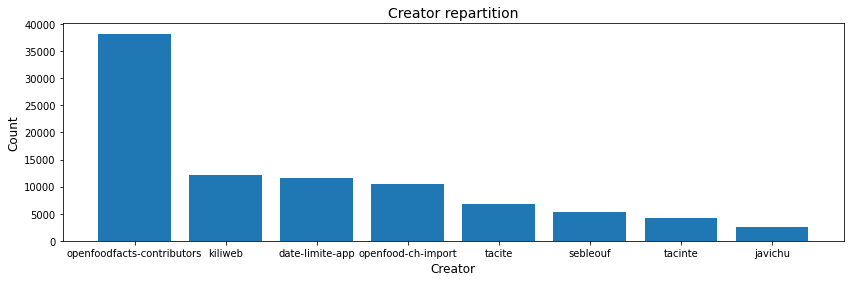

In [13]:
fig, ax = plt.subplots(figsize = (14,4))
"""color = ['red' if data['country_1'][i] == 'en:united-states'
         else 'blue' if data['country_1'][i] == 'en:france'
         else 'gray'
         for i in data.index]"""
ax.bar(creators_agg.index[1:9], creators_agg.values[1:9])
ax.set_xlabel('Creator', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Creator repartition', size=14)

<a name='nutrition_grade'></a>
## `Nutrition grade`

### Nutrition grade repartition

In [14]:
nutrition_grade_agg = data['nutrition_grade_fr'].value_counts().sort_index(ascending=True)

Text(0.5, 1.0, 'Nutrition grade repartition')

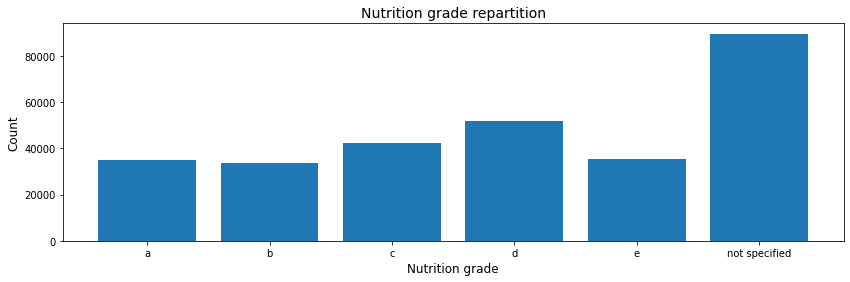

In [15]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(nutrition_grade_agg.index, nutrition_grade_agg.values)
ax.set_xlabel('Nutrition grade', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Nutrition grade repartition', size=14)

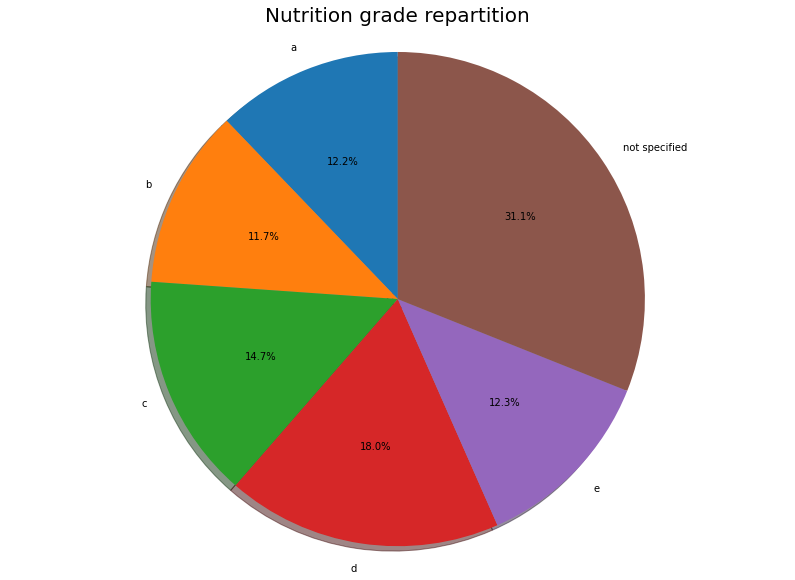

In [16]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(nutrition_grade_agg.values, labels=nutrition_grade_agg.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Nutrition grade repartition', size=20)
plt.show()

<a name='brands'></a>
## `Brand`

In [17]:
brands_agg = aggregate(data['brand_1'], data['brand_2'], data['brand_3'])

In [18]:
brands_agg

not specified              556146.0
carrefour                    3629.0
auchan                       2776.0
propiedad-de                 2436.0
meijer                       2310.0
                             ...   
jacquot-et-cie                  1.0
jacques-sablery                 1.0
jacques-menou-patissier         1.0
jacques-menou                   1.0
칠성                              1.0
Length: 42847, dtype: float64

Text(0.5, 1.0, 'Brand repartition')

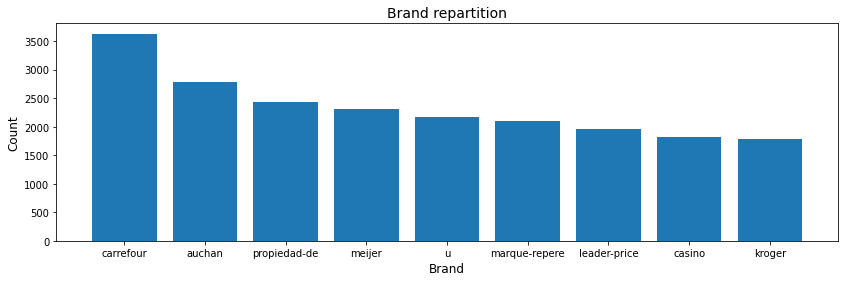

In [19]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(brands_agg.index[1:10], brands_agg.values[1:10])
ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Brand repartition', size=14)

<a name='additives'></a>
## `Additive`

In [20]:
additives_agg = pd.DataFrame(data['additive_1'].value_counts()).merge(data['additive_2'].value_counts(),
                                                                      how='outer',
                                                                      left_index=True,
                                                                      right_index=True)
additives_agg = additives_agg.merge(data['additive_3'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_4'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_5'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_6'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_7'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_8'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_9'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_10'].value_counts(), how='outer', left_index=True, right_index=True)

additives_agg = additives_agg.fillna(0)
additives_agg = (additives_agg[additives_agg.columns[0]]
                 + additives_agg[additives_agg.columns[1]]
                 + additives_agg[additives_agg.columns[2]]
                 + additives_agg[additives_agg.columns[3]]
                 + additives_agg[additives_agg.columns[4]]
                 + additives_agg[additives_agg.columns[5]]
                 + additives_agg[additives_agg.columns[6]]
                 + additives_agg[additives_agg.columns[7]]
                 + additives_agg[additives_agg.columns[8]]
                 + additives_agg[additives_agg.columns[9]]).sort_values(ascending=False)

In [21]:
additives_agg[1:20]

water           55689.0
flour           47806.0
sugar           47637.0
salt            32426.0
wheat-flour     26716.0
milk            23728.0
oil             23515.0
syrup           19411.0
eau             16416.0
corn-syrup      16409.0
niacin          15597.0
sucre           14445.0
iron            12148.0
citric-acid     11063.0
vinegar          9881.0
farine           9058.0
farine-de        8745.0
reduced-iron     8744.0
sel              8726.0
dtype: float64

Text(0.5, 1.0, 'Additive repartition')

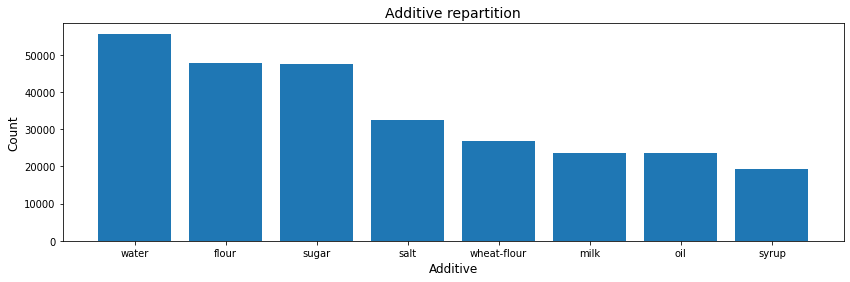

In [22]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(additives_agg.index[1:9], additives_agg.values[1:9])
ax.set_xlabel('Additive', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Additive repartition', size=14)

<a name='_100g'></a>
## *Per 100g* components

In [23]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
cols_100g = num_cols.copy()
cols_100g.remove('energy_100g')
print(cols_100g)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


### Boxplots

<AxesSubplot: >

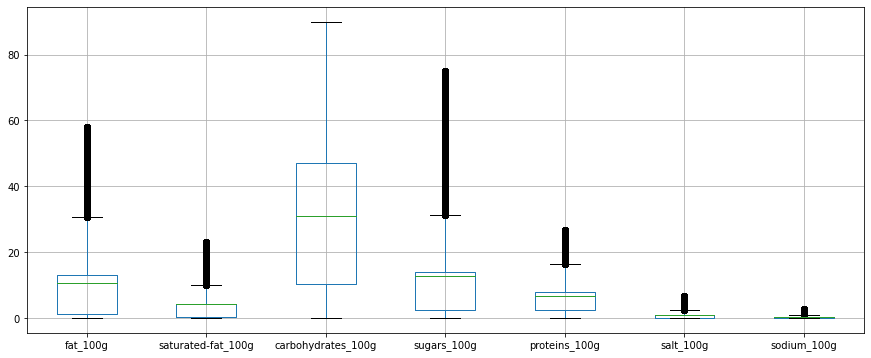

In [24]:
plt.figure(figsize=(15,6))
data.boxplot(column=cols_100g)

<a name='date_created'></a>
## `Date created`

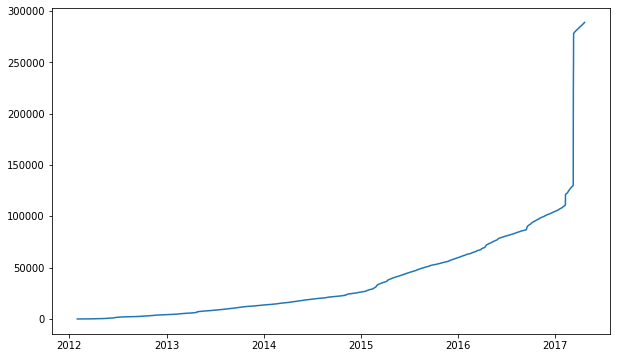

In [25]:
plt.figure(figsize=(10,6))
plt.plot(data['date_created'].sort_values(ascending=True), range(len(data)), '-')

#### Observations:

We can see that items are added steadily over time, with a huge spike of added items in 2017.

<a name='last_modified'></a>
## `Last modified`

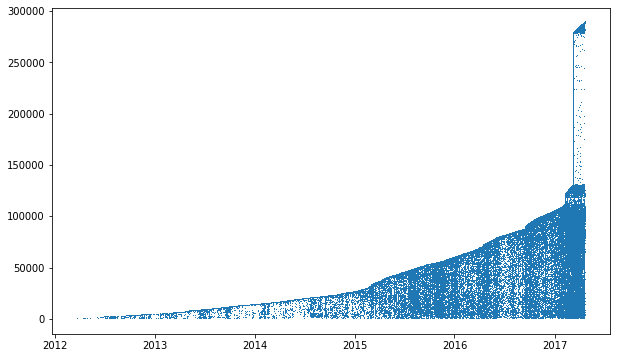

In [26]:
plt.figure(figsize=(10,6))
plt.plot(data.sort_values(by='date_created', ascending=True)['last_modified'], range(len(data)), ',')

#### Observations:

This shows us that even items created a long time ago keep getting modified.

<a name='bivariate_analyses'></a>
# Bivariate analyses

## `Nutrition grade` vs `Country`

In [27]:
grade_agg_fr = data[(data['country_1'] == 'en:france')
                    | (data['country_2'] == 'en:france')
                    | (data['country_3'] == 'en:france')]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)
grade_agg_us = data[(data['country_1'] == 'en:united-states')
                    | (data['country_2'] == 'en:united-states')
                    | (data['country_3'] == 'en:united-states')]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)
grade_agg_other = data[(data['country_1'] != 'en:france')
                       & (data['country_1'] != 'en:united-states')
                       & (data['country_2'] != 'en:france')
                       & (data['country_2'] != 'en:united-states')
                       & (data['country_3'] != 'en:france')
                       & (data['country_3'] != 'en:united-states')
                      ]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)

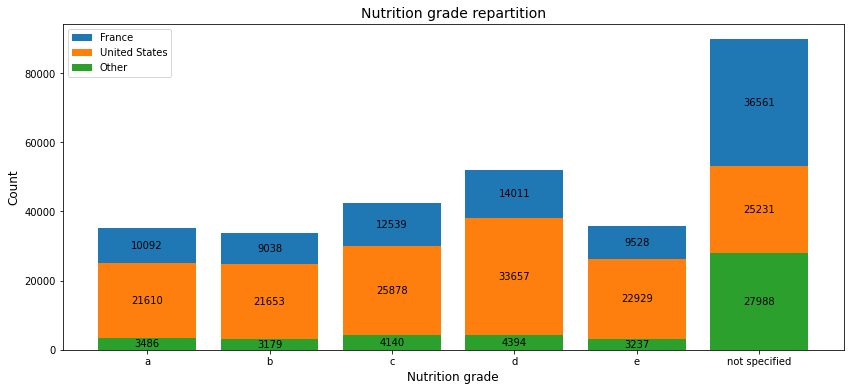

In [28]:
fig, ax = plt.subplots(figsize = (14,6))

fr = ax.bar(nutrition_grade_agg.index, grade_agg_fr.values, bottom=grade_agg_us.values + grade_agg_other.values, label='France')
us = ax.bar(nutrition_grade_agg.index, grade_agg_us.values, bottom=grade_agg_other.values, label='United States')
other = ax.bar(nutrition_grade_agg.index, grade_agg_other.values, label='Other')

ax.set_xlabel('Nutrition grade', size=12)
ax.set_ylabel('Count', size=12)
ax.legend()
ax.set_title('Nutrition grade repartition', size=14)
ax.bar_label(fr, label_type='center')
ax.bar_label(us, label_type='center')
ax.bar_label(other, label_type='center')

plt.show()

## `energy_100g` vs `Country`

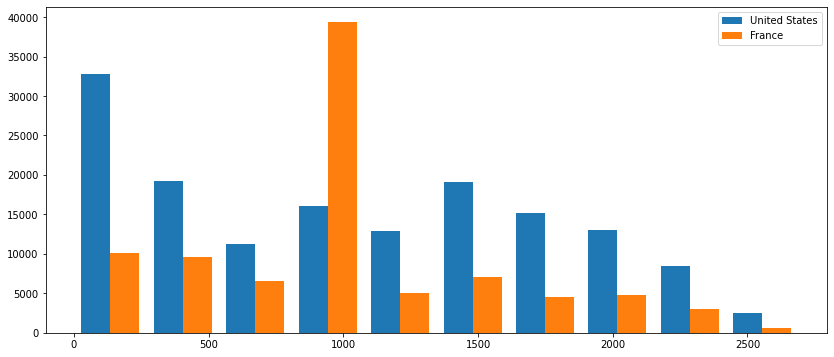

In [29]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['country_1'] == 'en:united-states']['energy_100g'],
          data[data['country_1'] == 'en:france']['energy_100g']], bins=10, label=['United States', 'France'])
ax.legend()
plt.show()

## `fat_100g` vs `Country`

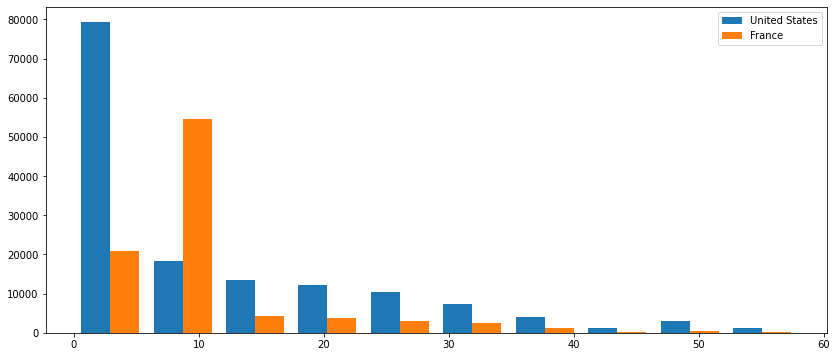

In [30]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['country_1'] == 'en:united-states']['fat_100g'],
          data[data['country_1'] == 'en:france']['fat_100g']], bins=10, label=['United States', 'France'])
ax.legend()
plt.show()

<a name='correlation'></a>
# Correlations

## Correlation matrix

- Pearson: linear relationships
- Spearmon: monotonic relationships

In [31]:
corrMatrix = data.corr(method='spearman')

In [32]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x > 0.9) & (x != 1)
                          else '')

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.693835,0.479468,0.680469,0.337112,0.487553,0.210377,0.210139
fat_100g,0.693835,1.000000,0.689579,0.210727,0.138818,0.474076,0.354985,0.354812
saturated-fat_100g,0.479468,0.689579,1.000000,0.081894,0.257993,0.250525,0.189149,0.189035
carbohydrates_100g,0.680469,0.210727,0.081894,1.000000,0.537793,0.147273,-0.041932,-0.042211
sugars_100g,0.337112,0.138818,0.257993,0.537793,1.000000,-0.195483,-0.201003,-0.201176
proteins_100g,0.487553,0.474076,0.250525,0.147273,-0.195483,1.000000,0.368595,0.368478
salt_100g,0.210377,0.354985,0.189149,-0.041932,-0.201003,0.368595,1.000000,0.999623
sodium_100g,0.210139,0.354812,0.189035,-0.042211,-0.201176,0.368478,0.999623,1.000000


#### Observations:

`sodium_100g` super correlated with `salt_100g`, which is logical since salt is basically sodium.

## Correlation heatmap

<AxesSubplot: >

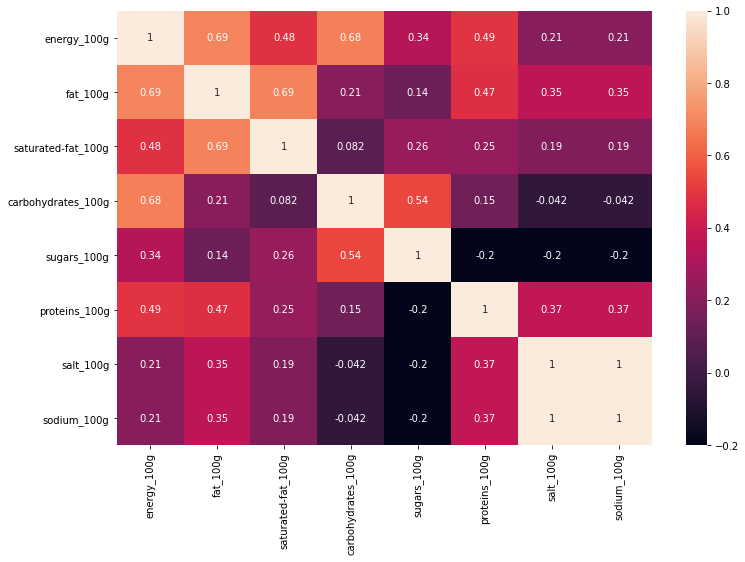

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(corrMatrix, annot=True)

## Salt vs Sodium

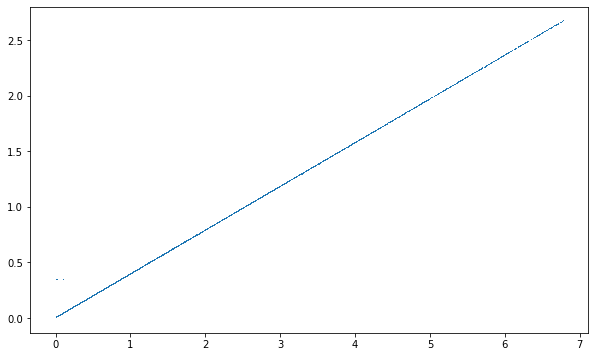

In [34]:
plt.figure(figsize=(10,6))
plt.plot(data['salt_100g'], data['sodium_100g'], ',')
plt.show()

In [35]:
data[['product_name', 'sodium_100g']].sort_values(by='sodium_100g', ascending=False).head(10)

,product_name,sodium_100g
41253,ponzu citrus seasoned dressing & sauce,2.667
13132,famous wing sauce & more,2.667
124993,cheddar potato,2.667
9457,buffalo wing sauce,2.667
87912,organic chili powder,2.667
12280,italian panko breadcrumbs,2.667
45083,"redhot, hot buffalo wings sauce",2.667
101603,powerade drops,2.667
51315,organic chili powder,2.667
55904,"grill mates, brown sugar, bourbon",2.667


In [36]:
data[['product_name', 'salt_100g']].sort_values(by='salt_100g', ascending=False).head(10)

,product_name,salt_100g
84312,chili sauce,6.77418
97181,organic caribbean jerk sauce & marinade,6.77418
12280,italian panko breadcrumbs,6.77418
41253,ponzu citrus seasoned dressing & sauce,6.77418
109709,non-pareil capers,6.77418
45083,"redhot, hot buffalo wings sauce",6.77418
51315,organic chili powder,6.77418
149347,nonpareil imported capers,6.77418
68474,"blue cheese jalapeno seasoning blend, spicy",6.77418
284763,corn cream soup powder,6.77418


## Energy vs Fat

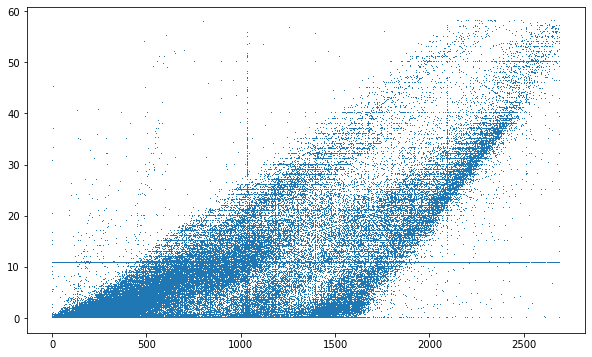

In [37]:
plt.figure(figsize=(10,6))
plt.plot(data['energy_100g'], data['fat_100g'], ',') # rajouter grade en couleur

## Energy vs Salt

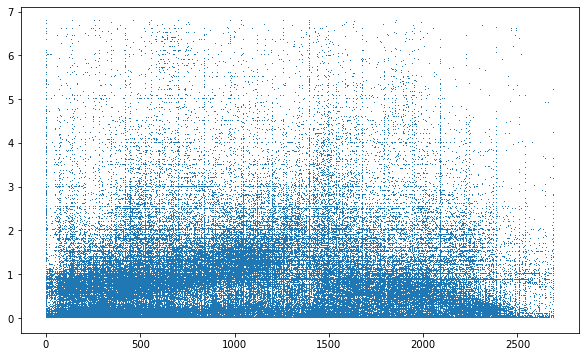

In [38]:
plt.figure(figsize=(10,6))
plt.plot(data['energy_100g'], data['salt_100g'], ',')

## Saturated_fat vs carbohydrates

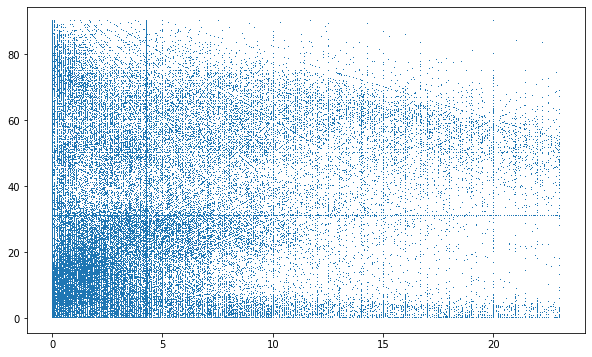

In [39]:
plt.figure(figsize=(10,6))
plt.plot(data['saturated-fat_100g'], data['carbohydrates_100g'], ',')

# PCA

In [57]:
quantitative_features = data.select_dtypes(include=np.number).columns.tolist()
X = data[quantitative_features]

In [53]:
quantitative_features

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [55]:
scaler = StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler()

In [59]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 2.40034515e-06, -2.70475397e-06, -2.71777012e-06,
         6.88054832e-06,  1.02824472e-05, -6.28697572e-05,
        -3.00217124e-06, -3.00306421e-06],
       [ 1.40703883e+00,  6.38801592e-01, -8.90237190e-01,
         1.25595034e+00,  2.42669044e-01,  1.88716221e+00,
        -2.58884368e-01, -2.59097390e-01],
       [ 2.33409633e+00,  4.17878357e+00,  2.34926235e-01,
        -5.58493321e-01, -6.82539555e-01,  1.88716221e+00,
         3.87273365e-01,  3.87108047e-01],
       [ 8.04993147e-01, -8.41898609e-01, -2.71777012e-06,
         1.95166351e+00,  1.02824472e-05,  3.16094017e-01,
        -3.00217124e-06, -3.00306421e-06],
       [ 1.39465743e+00,  6.75751505e-01, -4.87193575e-01,
         1.37239655e+00, -1.66520483e-01,  1.14306102e+00,
        -3.00217124e-06, -3.00306421e-06]])

In [60]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [96]:
n_components = 6

In [97]:
pca = PCA(n_components=n_components)

In [98]:
pca.fit(X_scaled)

PCA(n_components=6)

In [99]:
pca.explained_variance_ratio_

array([0.36473786, 0.28444907, 0.15903297, 0.10142837, 0.05038029,
       0.03374919])

In [100]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([36.47, 28.44, 15.9 , 10.14,  5.04,  3.37])

In [101]:
scree_cum = scree.cumsum().round()
scree_cum

array([36., 65., 81., 91., 96., 99.])

In [102]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

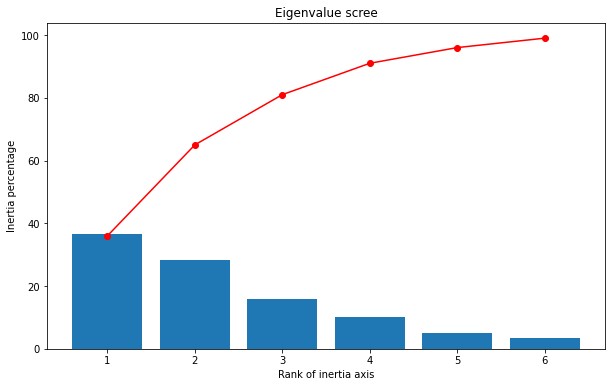

In [117]:
plt.figure(figsize=(10,6))
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rank of inertia axis")
plt.ylabel("Inertia percentage")
plt.title("Eigenvalue scree")
plt.show()

In [104]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.519290,0.487300,0.410210,0.238077,0.147602,0.325629,0.264701,0.264645
1,-0.229173,-0.021457,-0.093495,-0.393317,-0.480483,0.196543,0.506970,0.507019
2,0.051937,-0.322599,-0.337677,0.489000,0.349735,-0.329740,0.393106,0.393078
3,-0.199637,0.164440,0.511545,-0.368662,0.296046,-0.644399,0.127701,0.127727
4,0.272077,0.458555,-0.289066,0.158992,-0.543434,-0.554717,-0.043801,-0.043746
5,-0.024690,-0.457256,0.602426,0.418517,-0.491821,-0.100529,-0.010922,-0.010952


In [105]:
pcs.columns = quantitative_features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
F1,0.52,0.49,0.41,0.24,0.15,0.33,0.26,0.26
F2,-0.23,-0.02,-0.09,-0.39,-0.48,0.20,0.51,0.51
F3,0.05,-0.32,-0.34,0.49,0.35,-0.33,0.39,0.39
F4,-0.20,0.16,0.51,-0.37,0.30,-0.64,0.13,0.13
F5,0.27,0.46,-0.29,0.16,-0.54,-0.55,-0.04,-0.04
F6,-0.02,-0.46,0.60,0.42,-0.49,-0.10,-0.01,-0.01


In [106]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.519290,-0.229173,0.051937,-0.199637,0.272077,-0.024690
fat_100g,0.487300,-0.021457,-0.322599,0.164440,0.458555,-0.457256
saturated-fat_100g,0.410210,-0.093495,-0.337677,0.511545,-0.289066,0.602426
carbohydrates_100g,0.238077,-0.393317,0.489000,-0.368662,0.158992,0.418517
sugars_100g,0.147602,-0.480483,0.349735,0.296046,-0.543434,-0.491821
proteins_100g,0.325629,0.196543,-0.329740,-0.644399,-0.554717,-0.100529
salt_100g,0.264701,0.506970,0.393106,0.127701,-0.043801,-0.010922
sodium_100g,0.264645,0.507019,0.393078,0.127727,-0.043746,-0.010952


<AxesSubplot: >

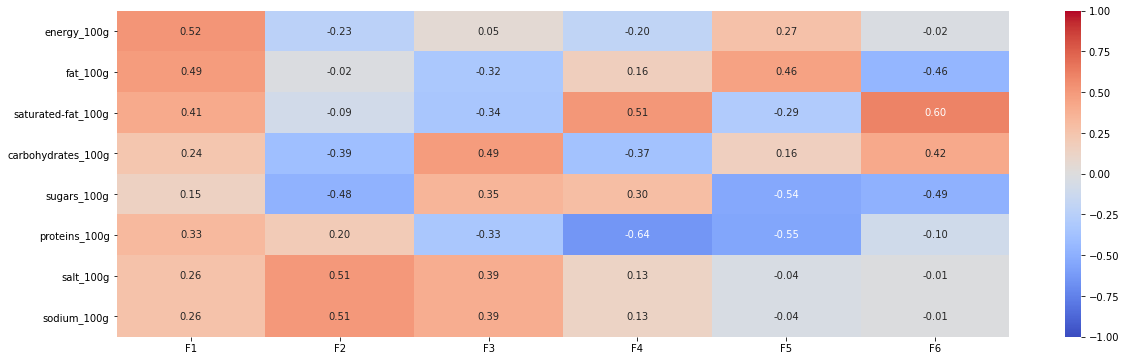

In [107]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [108]:
x, y = 0,1

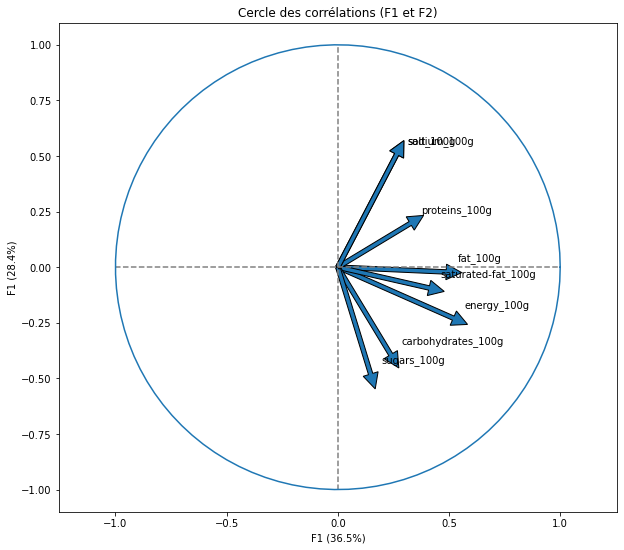

In [109]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             quantitative_features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)